# Generator tekstu - Mateusz Sikora, Michał Sienkiewicz

źródła:

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/8.1-text-generation-with-lstm.ipynb

https://medium.com/towards-artificial-intelligence/word-level-text-generation-dd61a5a0313d

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
data = open('./data/wiersze/Tadeusz.txt', encoding="utf8").read()

corpus = data.lower().split("\n")

In [4]:
#Program stosuje tzw tokenizacje, czyli proces polegający na podziale całego tekstu na ciąg pojedynczych tokenów
#tokeny to ciągi znaków, ograniczone ustalonymi separatorami takimi jak spacje lub przecinki

tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [5]:
# za pomocą tokenów tworzymy sekwencje wejściowe (ciągi wyrazów)
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
#stworzenie sekwencyjnego modelu warstw, który będzie reprezontował sieć neuronową
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(512)))
model.add(Dropout(0.3))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 100)           274500    
_________________________________________________________________
bidirectional (Bidirectional (None, 1024)              2510848   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 2745)              2813625   
Total params: 5,598,973
Trainable params: 5,598,973
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
#nasz program jest w trakcie nauki:
history = model.fit(predictors, label, epochs=30, verbose=2)

Epoch 1/30
143/143 - 22s - loss: 7.6058 - accuracy: 0.0268
Epoch 2/30
143/143 - 22s - loss: 7.1823 - accuracy: 0.0268
Epoch 3/30
143/143 - 21s - loss: 6.9797 - accuracy: 0.0283
Epoch 4/30
143/143 - 21s - loss: 6.7399 - accuracy: 0.0259
Epoch 5/30
143/143 - 21s - loss: 6.4459 - accuracy: 0.0334
Epoch 6/30
143/143 - 22s - loss: 6.0767 - accuracy: 0.0398
Epoch 7/30
143/143 - 22s - loss: 5.6195 - accuracy: 0.0508
Epoch 8/30
143/143 - 21s - loss: 5.0213 - accuracy: 0.0681
Epoch 9/30
143/143 - 21s - loss: 4.3399 - accuracy: 0.1206
Epoch 10/30
143/143 - 20s - loss: 3.5438 - accuracy: 0.2065
Epoch 11/30
143/143 - 20s - loss: 2.7991 - accuracy: 0.3553
Epoch 12/30
143/143 - 20s - loss: 2.1236 - accuracy: 0.5188
Epoch 13/30
143/143 - 20s - loss: 1.6421 - accuracy: 0.6126
Epoch 14/30
143/143 - 20s - loss: 1.2985 - accuracy: 0.6961
Epoch 15/30
143/143 - 21s - loss: 1.0373 - accuracy: 0.7596
Epoch 16/30
143/143 - 23s - loss: 0.8662 - accuracy: 0.8027
Epoch 17/30
143/143 - 21s - loss: 0.7743 - accura

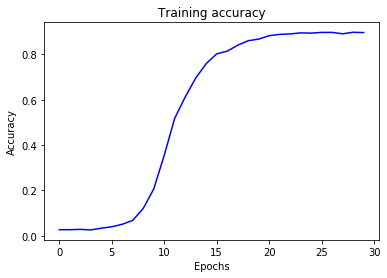

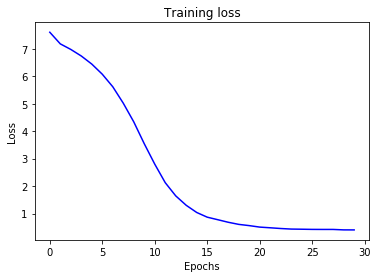

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

# Get the number of epochs
epochs = range(len(acc))

# Plot accuracy per epoch (wykres dokładności)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training accuracy')

plt.figure()

# Plot loss per epoch (wykres straty)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Training loss')

plt.show()

In [9]:
seed_text = "Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek,"
next_words = 150
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [10]:
print(seed_text)

Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek, go dowie krajów krajów kroczy kroczy krajów krajów podzielić po szubie stołu i światem mędrsi proszeni bliźnięta kroczy na francuza poufali czwartą do dworu krajów krajów do szacie francuza krajów krajów dowie krajów krajów suwarów w słowa słowa oczyma odmiana faworyty się sądzie młodzieniec go powitać krajów robić krajów krajów suwarów w słowa prawo mniej rządzie odmiana gładząc mglisty mglisty postąpił postąpił krajów mój kusy rejtan swobody gorszą — mój łona opiekę ostrzem czwartą do łona krajów przestraszone pod jezior dworu całej dowie po francuza krajów kraj

In [11]:
#dodanie do programu czynności usuwania powtórzeń
seed_text = "Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek,"
next_words = 300
lll = "Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek,"
gg=0
 
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    if (gg==output_word):
        x=0
    else:
        lll += " " + output_word
    gg=output_word

In [12]:
print(lll)

Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek, go dowie krajów kroczy krajów podzielić po szubie stołu i światem mędrsi proszeni bliźnięta kroczy na francuza poufali czwartą do dworu krajów do szacie francuza krajów dowie krajów suwarów w słowa oczyma odmiana faworyty się sądzie młodzieniec go powitać krajów robić krajów suwarów w słowa prawo mniej rządzie odmiana gładząc mglisty postąpił krajów mój kusy rejtan swobody gorszą — mój łona opiekę ostrzem czwartą do łona krajów przestraszone pod jezior dworu całej dowie po francuza krajów robić krajów pilni podzielić należy — sądzie krajów raną ochłonął na kształt

In [13]:
#dodanie do programu czynności dodawania nowych zdań
seed_text = "Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek,"
next_words = 150
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    if len(seed_text) % 15 == 0 :
        seed_text+= '\n'

In [14]:
print(seed_text)

Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek, go dowie krajów krajów kroczy kroczy krajów krajów
 podzielić po szubie stołu i światem mędrsi proszeni bliźnięta kroczy na francuza poufali
 czwartą do dworu krajów krajów do szacie francuza krajów krajów dowie krajów krajów suwarów w słowa słowa oczyma odmiana faworyty się
 sądzie młodzieniec go powitać krajów robić krajów krajów suwarów w słowa prawo mniej rządzie odmiana gładząc mglisty mglisty postąpił
 postąpił krajów mój kusy rejtan swobody gorszą — mój łona opiekę ostrzem czwartą do łona
 krajów przestraszone pod jezior dworu całej
 dowie po francuza krajó

In [15]:
#połączenie ze sobą dwóch ostatnio dodanych opcji w jedną całość
seed_text = "Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek,"
next_words = 300
lll = "Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek,"
gg=0
 
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    if (gg==output_word):
        x=0
    else:
        lll += " " + output_word
    gg=output_word
    if len(seed_text) % 15 == 0 :
        lll+= '\n'

In [16]:
print(lll)

Samotność cóż po ludziach, czym śpiewak dla ludzi? Gdzie człowiek, co z mej pieśni całą myśl wysłucha, Obejmie okiem wszystkie promienie jej ducha? Nieszczęsny, kto dla ludzi głos i język trudzi: Język kłamie głosowi, a głos myślom kłamie; Myśl z duszy leci bystro, nim się w słowach złamie, A słowa myśl pochłoną i tak drżą nad myślą, Jak ziemia nad połkniętą, niewidzialną rzeką. Z drżenia ziemi czyż ludzie głąb nurtów dociek, go dowie krajów kroczy krajów
 podzielić po szubie stołu i światem mędrsi proszeni bliźnięta kroczy na francuza poufali czwartą do dworu krajów
 do szacie francuza krajów dowie krajów suwarów w słowa
 oczyma odmiana
 faworyty się sądzie młodzieniec go powitać krajów robić krajów suwarów w słowa prawo mniej rządzie odmiana gładząc mglisty postąpił krajów mój kusy rejtan swobody gorszą — mój łona opiekę ostrzem czwartą do łona krajów przestraszone pod jezior dworu całej dowie po francuza krajów robić krajów pilni podzielić należy — sądzie krajów raną
 ochłonął na ks